In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s5e8/sample_submission.csv
/kaggle/input/playground-series-s5e8/train.csv
/kaggle/input/playground-series-s5e8/test.csv


# Load dataset

In [2]:
train_df = pd.read_csv("/kaggle/input/playground-series-s5e8/train.csv")
test_df = pd.read_csv("/kaggle/input/playground-series-s5e8/test.csv") 

In [3]:
train_df.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,117,3,-1,0,unknown,0
1,1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,185,1,-1,0,unknown,0
2,2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,111,2,-1,0,unknown,0
3,3,27,student,single,secondary,no,34,yes,no,unknown,28,may,10,2,-1,0,unknown,0
4,4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,902,1,-1,0,unknown,1


# EDA

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 18 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   id         750000 non-null  int64 
 1   age        750000 non-null  int64 
 2   job        750000 non-null  object
 3   marital    750000 non-null  object
 4   education  750000 non-null  object
 5   default    750000 non-null  object
 6   balance    750000 non-null  int64 
 7   housing    750000 non-null  object
 8   loan       750000 non-null  object
 9   contact    750000 non-null  object
 10  day        750000 non-null  int64 
 11  month      750000 non-null  object
 12  duration   750000 non-null  int64 
 13  campaign   750000 non-null  int64 
 14  pdays      750000 non-null  int64 
 15  previous   750000 non-null  int64 
 16  poutcome   750000 non-null  object
 17  y          750000 non-null  int64 
dtypes: int64(9), object(9)
memory usage: 103.0+ MB


In [5]:
train_df.isnull().sum()                  # no null values

id           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [6]:
train_df.describe()

,id,age,balance,day,duration,campaign,pdays,previous,y
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,374999.500000,40.926395,1204.067397,16.117209,256.229144,2.577008,22.412733,0.298545,0.120651
std,216506.495284,10.098829,2836.096759,8.250832,272.555662,2.718514,77.319998,1.335926,0.325721
min,0.000000,18.000000,-8019.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,0.000000
25%,187499.750000,33.000000,0.000000,9.000000,91.000000,1.000000,-1.000000,0.000000,0.000000
50%,374999.500000,39.000000,634.000000,17.000000,133.000000,2.000000,-1.000000,0.000000,0.000000
75%,562499.250000,48.000000,1390.000000,21.000000,361.000000,3.000000,-1.000000,0.000000,0.000000
max,749999.000000,95.000000,99717.000000,31.000000,4918.000000,63.000000,871.000000,200.000000,1.000000


In [7]:
train_df.shape

(750000, 18)

In [8]:
cat_cols = train_df.select_dtypes(include=["object"]).columns
print(cat_cols)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')


In [9]:
num_cols = train_df.select_dtypes(exclude=["object"]).columns
print(num_cols)

Index(['id', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays',
       'previous', 'y'],
      dtype='object')


In [10]:
for col in cat_cols:
    print(train_df[col].value_counts())
    print("----------------------------------")

job
management       175541
blue-collar      170498
technician       138107
admin.            81492
services          64209
retired           35185
self-employed     19020
entrepreneur      17718
unemployed        17634
housemaid         15912
student           11767
unknown            2917
Name: count, dtype: int64
----------------------------------
marital
married     480759
single      194834
divorced     74407
Name: count, dtype: int64
----------------------------------
education
secondary    401683
tertiary     227508
primary       99510
unknown       21299
Name: count, dtype: int64
----------------------------------
default
no     737151
yes     12849
Name: count, dtype: int64
----------------------------------
housing
yes    411288
no     338712
Name: count, dtype: int64
----------------------------------
loan
no     645023
yes    104977
Name: count, dtype: int64
----------------------------------
contact
cellular     486655
unknown      231627
telephone     31718
Name: count, d

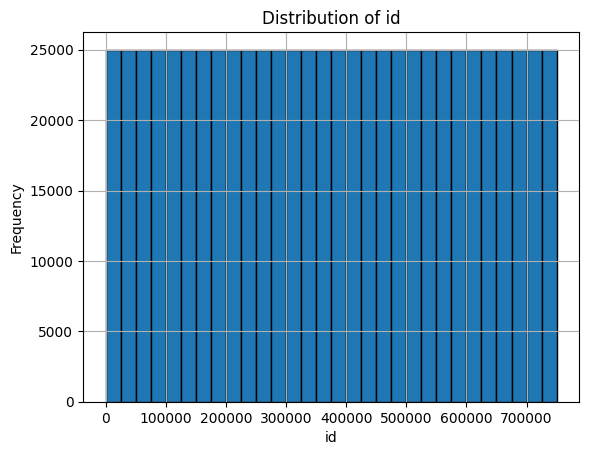

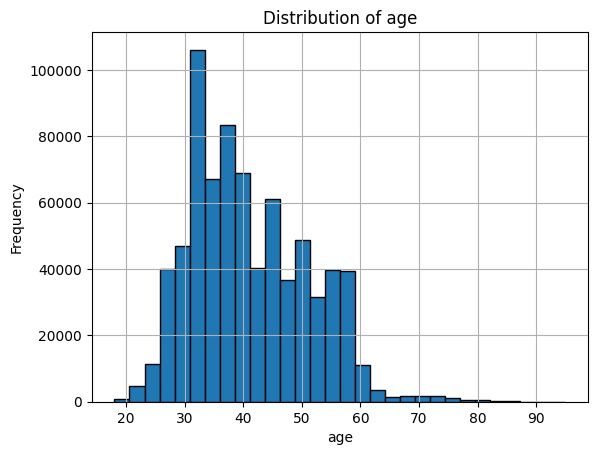

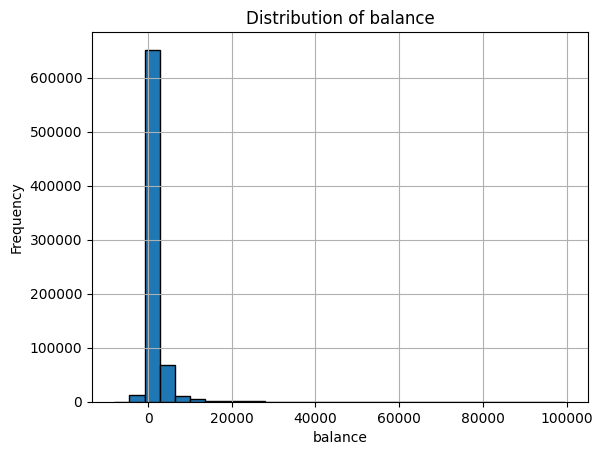

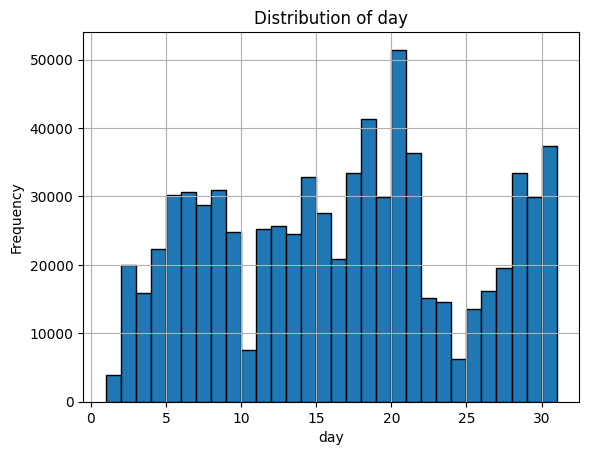

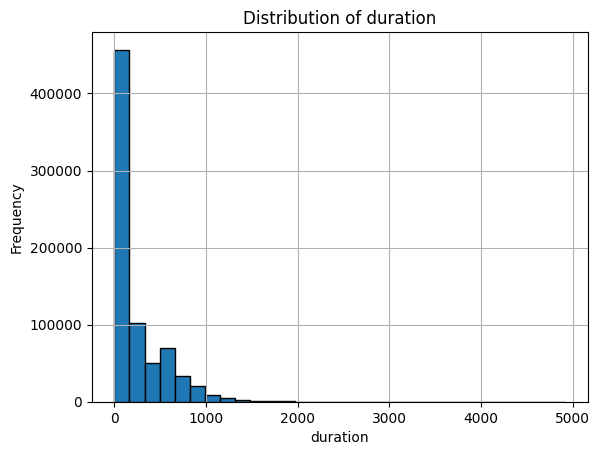

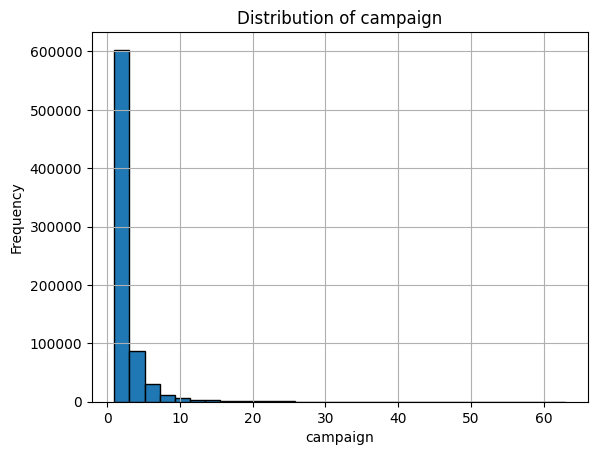

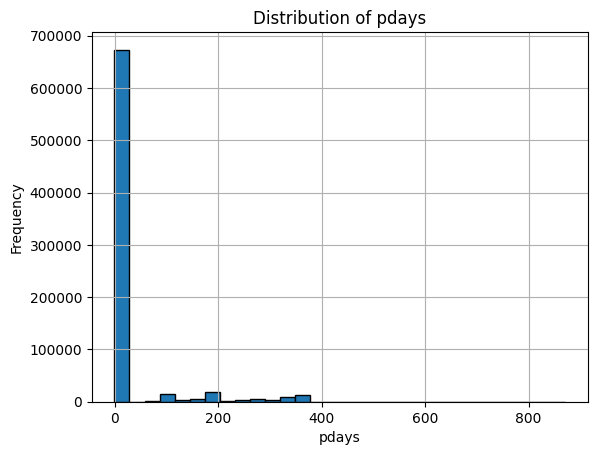

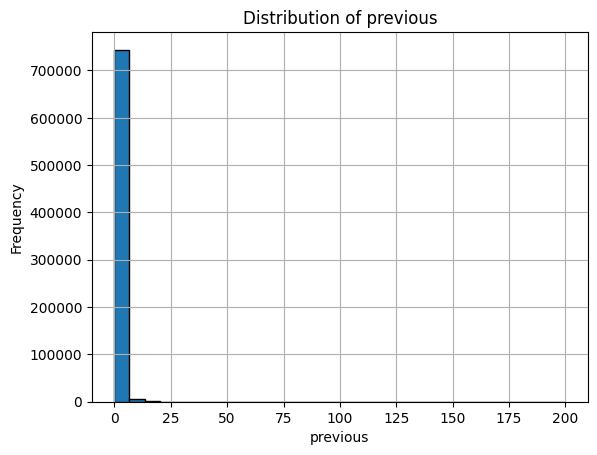

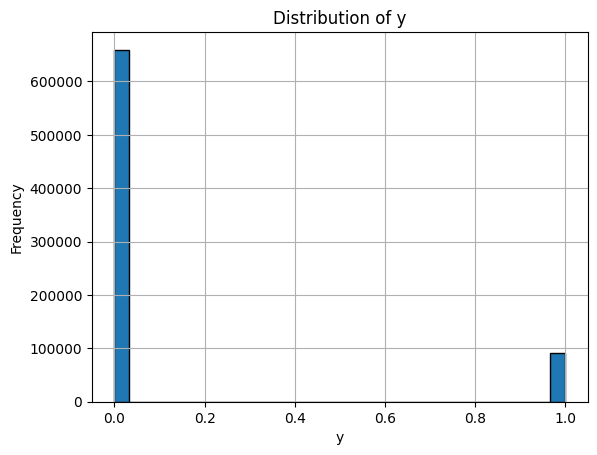

In [11]:
import matplotlib.pyplot as plt

for col in num_cols:
    train_df[col].hist(bins=30, edgecolor='black')
    plt.xlabel(f"{col}")
    plt.ylabel("Frequency")
    plt.title(f"Distribution of {col}")
    plt.show()

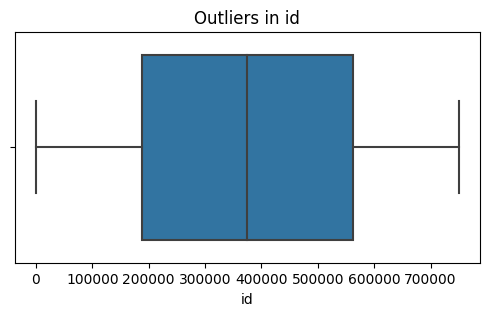

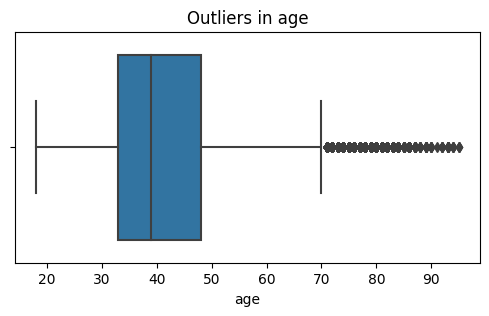

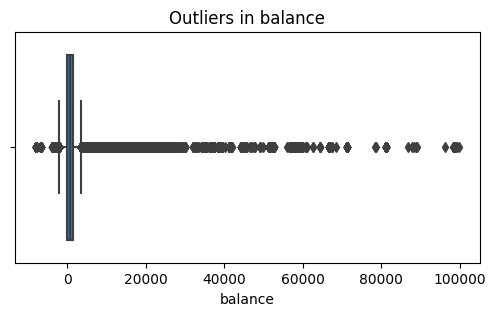

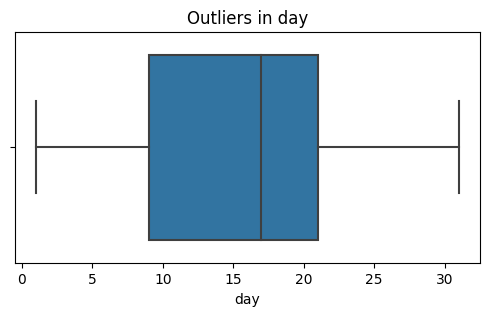

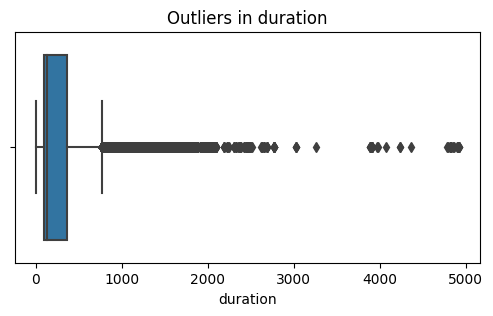

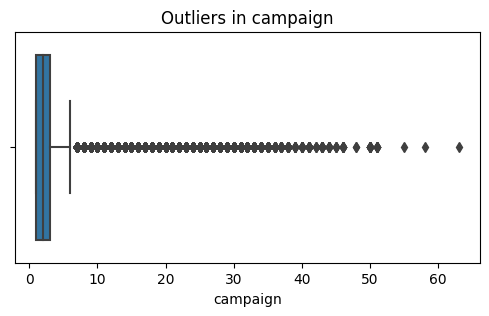

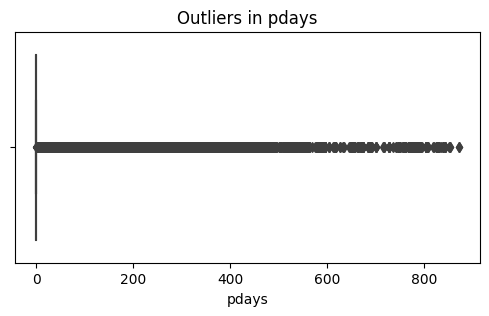

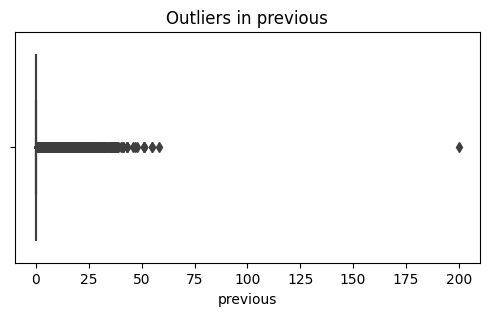

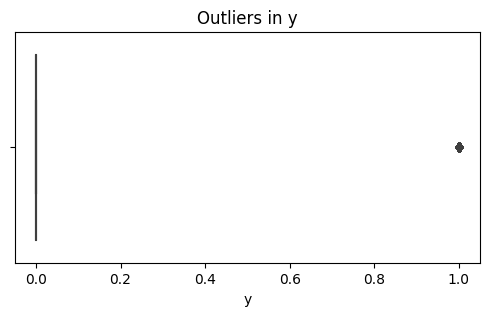

In [12]:
import seaborn as sns
for col in num_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=train_df[col])
    plt.title(f"Outliers in {col}")
    plt.show()

# Feature engeneering


In [13]:
import numpy as np
from scipy import stats

numeric_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays','previous']

# calculate z-scores
z_scores = np.abs(stats.zscore(train_df[numeric_cols]))
threshold = 3

# boolean DataFrame of outliers
outliers = (z_scores > threshold)

# count outliers per column
outlier_counts = outliers.sum(axis=0)
print("Outliers per column:")
print(outlier_counts)

# total number of outlier cells
print("\nTotal outlier values:", outliers.sum().sum())


Outliers per column:
[ 4109  9287     0 13141 15045 30860 12194]

Total outlier values: 84636


In [14]:
for i, col in enumerate(numeric_cols):
    col_mean = train_df[col].mean()
    col_std = train_df[col].std()
    upper_limit = col_mean + threshold * col_std
    lower_limit = col_mean - threshold * col_std
    
    train_df[col] = np.where(train_df[col] > upper_limit, upper_limit,
                 np.where(train_df[col] < lower_limit, lower_limit, train_df[col]))

    # transform test using same limits
    test_df[col] = np.where(test_df[col] > upper_limit, upper_limit,
               np.where(test_df[col] < lower_limit, lower_limit, test_df[col]))


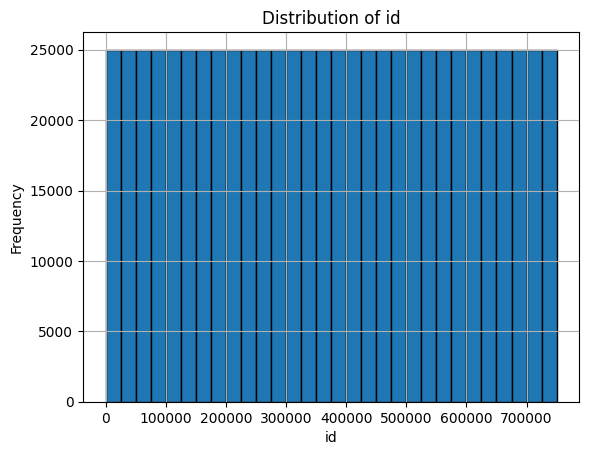

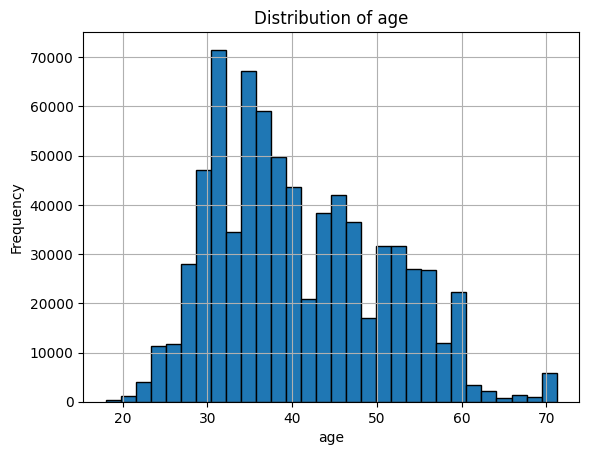

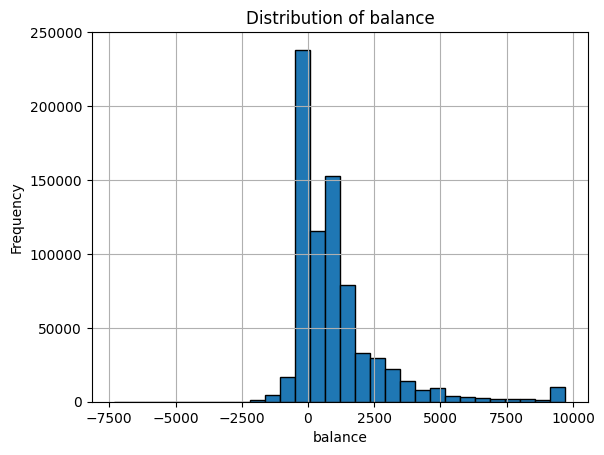

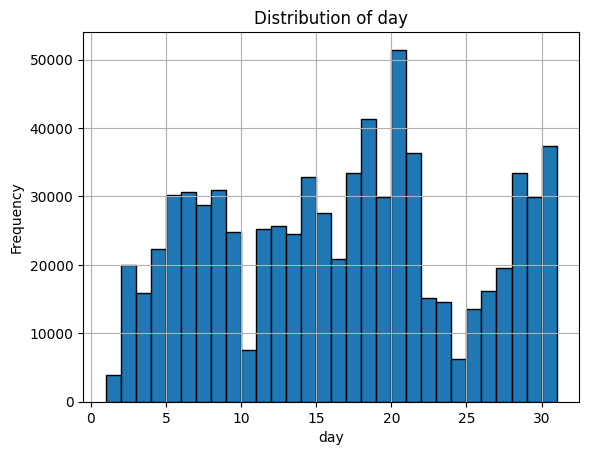

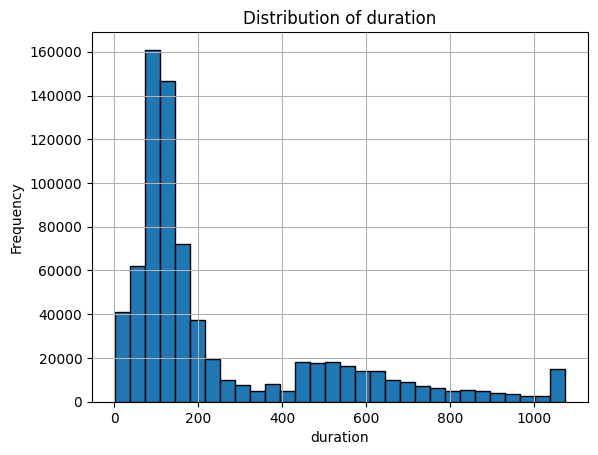

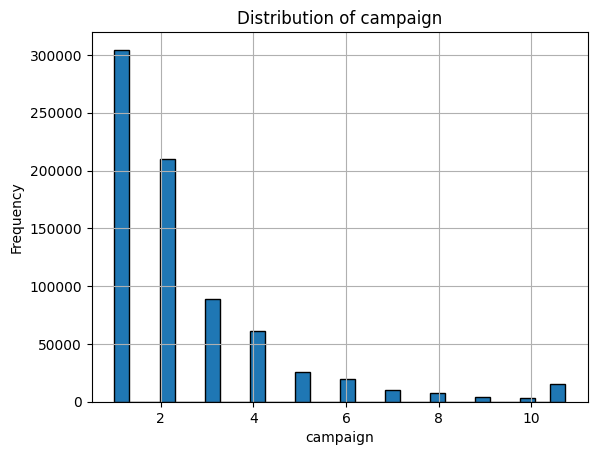

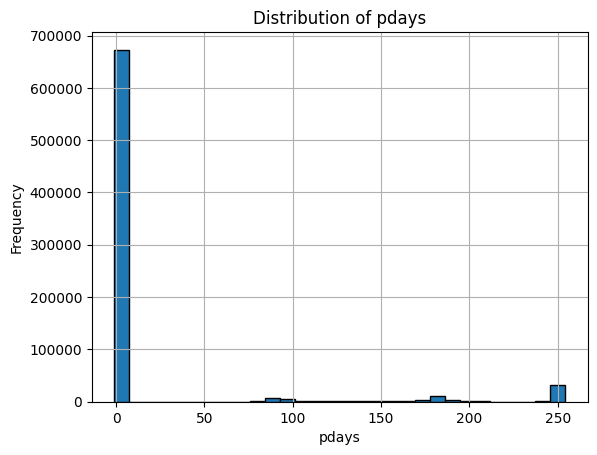

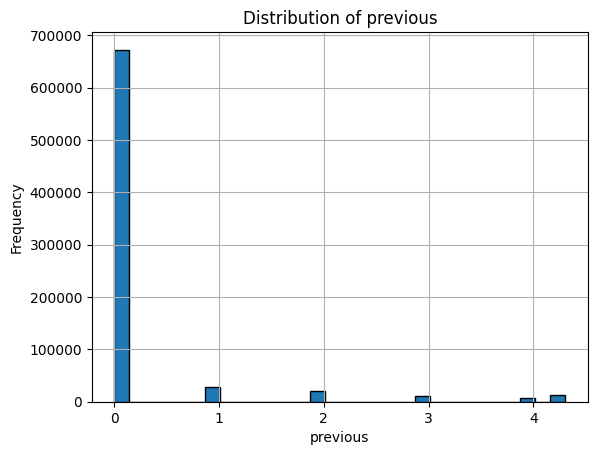

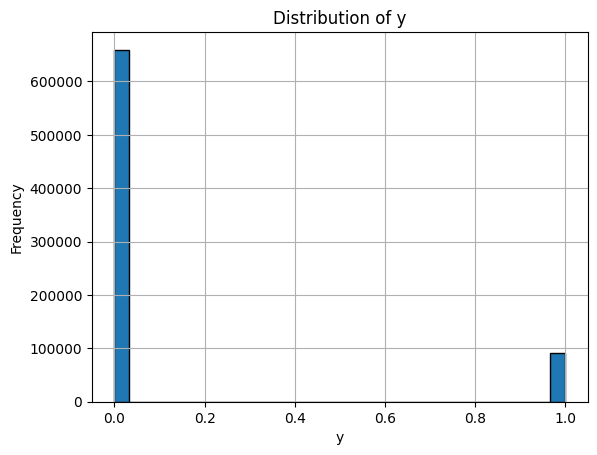

In [15]:
## After applying z-score on outliers
for col in num_cols:
    train_df[col].hist(bins=30, edgecolor='black')
    plt.xlabel(f"{col}")
    plt.ylabel("Frequency")
    plt.title(f"Distribution of {col}")
    plt.show()

In [16]:
## replacing binary column values to 0 and 1
bin_col = ["default","housing","loan"]
for col in bin_col:
    train_df[col] = train_df[col].map({'no': 0, 'yes': 1})

In [17]:
## do same in test set
for col in bin_col:
    test_df[col] = test_df[col].map({'no': 0, 'yes': 1})

In [18]:
train_df.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,42.0,technician,married,secondary,0,7.0,0,0,cellular,25.0,aug,117.0,3.0,-1.0,0.0,unknown,0
1,1,38.0,blue-collar,married,secondary,0,514.0,0,0,unknown,18.0,jun,185.0,1.0,-1.0,0.0,unknown,0
2,2,36.0,blue-collar,married,secondary,0,602.0,1,0,unknown,14.0,may,111.0,2.0,-1.0,0.0,unknown,0
3,3,27.0,student,single,secondary,0,34.0,1,0,unknown,28.0,may,10.0,2.0,-1.0,0.0,unknown,0
4,4,26.0,technician,married,secondary,0,889.0,1,0,cellular,3.0,feb,902.0,1.0,-1.0,0.0,unknown,1


In [19]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 18 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         750000 non-null  int64  
 1   age        750000 non-null  float64
 2   job        750000 non-null  object 
 3   marital    750000 non-null  object 
 4   education  750000 non-null  object 
 5   default    750000 non-null  int64  
 6   balance    750000 non-null  float64
 7   housing    750000 non-null  int64  
 8   loan       750000 non-null  int64  
 9   contact    750000 non-null  object 
 10  day        750000 non-null  float64
 11  month      750000 non-null  object 
 12  duration   750000 non-null  float64
 13  campaign   750000 non-null  float64
 14  pdays      750000 non-null  float64
 15  previous   750000 non-null  float64
 16  poutcome   750000 non-null  object 
 17  y          750000 non-null  int64  
dtypes: float64(7), int64(5), object(6)
memory usage: 103.0+ MB


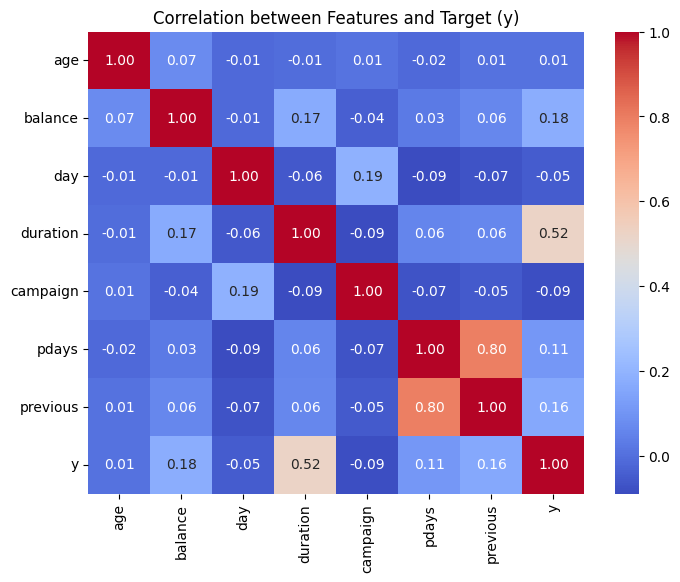

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# pick only numeric + encoded target
cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'y']

# compute correlation
df_corr = train_df[cols].copy()
corr = df_corr.corr()

# plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation between Features and Target (y)")
plt.show()


# Split dataset

In [21]:
##  Drop target column

X = train_df.drop(columns = 'y')
y = train_df['y'] 

In [22]:
print(f"Train shape: {X.shape}")
print(f"Target shape{y.shape}")

Train shape: (750000, 17)
Target shape(750000,)


In [23]:
## Split train set to train and validation set with 80:20 ratio
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2,random_state=42)

In [24]:
print(f"X_train shape: {X_train.shape}")
print(f"X_valid shape: {X_valid.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_valid shape: {y_valid.shape}")

X_train shape: (600000, 17)
X_valid shape: (150000, 17)
y_train shape: (600000,)
X_valid shape: (150000,)


# Encoding

In [25]:
oh_cols = ['job', 'marital', 'education', 'contact','month', 'poutcome']

In [26]:
## Apply one hot encoder to categorical columns
from sklearn.preprocessing import OneHotEncoder
ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown="ignore")

X_train_oh = pd.DataFrame(ohe_encoder.fit_transform(X_train[oh_cols]), index=X_train.index, columns=ohe_encoder.get_feature_names_out())

X_valid_oh = pd.DataFrame(ohe_encoder.transform(X_valid[oh_cols]), index=X_valid.index, columns=ohe_encoder.get_feature_names_out())

test_df_oh = pd.DataFrame(ohe_encoder.transform(test_df[oh_cols]), index=test_df.index,columns=ohe_encoder.get_feature_names_out())

In [27]:
## Join the encoded columns to original dataframe 
X_train = X_train.join(X_train_oh).drop(oh_cols,axis=1)
X_valid = X_valid.join(X_valid_oh).drop(oh_cols,axis=1)
test_df = test_df.join(test_df_oh).drop(oh_cols,axis=1)

In [28]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 600000 entries, 453635 to 121958
Data columns (total 49 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   600000 non-null  int64  
 1   age                  600000 non-null  float64
 2   default              600000 non-null  int64  
 3   balance              600000 non-null  float64
 4   housing              600000 non-null  int64  
 5   loan                 600000 non-null  int64  
 6   day                  600000 non-null  float64
 7   duration             600000 non-null  float64
 8   campaign             600000 non-null  float64
 9   pdays                600000 non-null  float64
 10  previous             600000 non-null  float64
 11  job_admin.           600000 non-null  float64
 12  job_blue-collar      600000 non-null  float64
 13  job_entrepreneur     600000 non-null  float64
 14  job_housemaid        600000 non-null  float64
 15  job_management   

# Scaling

In [29]:
## Apply min max scaler to train, valid and test set
# from sklearn.preprocessing import StandardScaler, MinMaxScaler
# scaler = MinMaxScaler()   
# X_train = pd.DataFrame(scaler.fit_transform(X_train) , index = X_train.index,columns = X_train.columns)   
# X_valid = pd.DataFrame(scaler.transform(X_valid) , index = X_valid.index,columns = X_valid.columns) 
# test_df = pd.DataFrame(scaler.transform(test_df) , index = test_df.index,columns = test_df.columns) 

In [30]:
## Apply min max scaler to train, valid and test set
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import pandas as pd

scaler = StandardScaler()

# Save id column separately
train_id = X_train['id']
valid_id = X_valid['id']
test_id = test_df['id']

# Drop id before scaling
X_train_noid = X_train.drop(columns=['id'])
X_valid_noid = X_valid.drop(columns=['id'])
test_noid = test_df.drop(columns=['id'])

# Scale
X_train = pd.DataFrame(scaler.fit_transform(X_train_noid), 
                       index=X_train.index, columns=X_train_noid.columns)
X_valid = pd.DataFrame(scaler.transform(X_valid_noid), 
                       index=X_valid.index, columns=X_valid_noid.columns)
test_df = pd.DataFrame(scaler.transform(test_noid), 
                       index=test_df.index, columns=test_noid.columns)

# Add id back as first column
X_train.insert(0, 'id', train_id.values)
X_valid.insert(0, 'id', valid_id.values)
test_df.insert(0, 'id', test_id.values)

In [31]:
X_train.head()

,id,age,default,balance,housing,loan,day,duration,campaign,pdays,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
453635,453635,-1.288355,-0.132565,2.286998,0.907608,2.476405,-0.499343,3.214678,-0.226361,-0.319848,...,-0.376988,-0.088051,1.510809,-0.310808,-0.111854,-0.09962,-0.253034,-0.14176,-0.155119,0.33954
11651,11651,1.012634,-0.132565,0.112704,-1.101797,-0.403811,1.318267,-0.520615,3.204343,-0.319848,...,-0.376988,-0.088051,-0.661897,-0.310808,-0.111854,-0.09962,-0.253034,-0.14176,-0.155119,0.33954
431999,431999,1.612892,-0.132565,-0.629249,-1.101797,-0.403811,1.560615,-0.645790,-0.716462,-0.319848,...,-0.376988,-0.088051,-0.661897,-0.310808,-0.111854,-0.09962,-0.253034,-0.14176,-0.155119,0.33954
529211,529211,0.712505,-0.132565,0.128746,0.907608,-0.403811,-0.135821,-0.661437,1.243941,-0.319848,...,-0.376988,-0.088051,1.510809,-0.310808,-0.111854,-0.09962,-0.253034,-0.14176,-0.155119,0.33954
110925,110925,-0.287925,-0.132565,-0.251684,0.907608,-0.403811,1.439441,1.102752,0.753840,-0.319848,...,-0.376988,-0.088051,-0.661897,-0.310808,-0.111854,-0.09962,-0.253034,-0.14176,-0.155119,0.33954


In [32]:
## Lets visualise the target column

from sklearn.decomposition import PCA
import plotly.express as px

# Apply PCA to reduce the data to 2 components
pca = PCA(n_components=2)
X_train_trf = pca.fit_transform(X_train)
y_train_trf = y_train

# Create a DataFrame for easier plotting
import pandas as pd
df = pd.DataFrame({
    'PCA1': X_train_trf[:, 0],  # First principal component
    'PCA2': X_train_trf[:, 1],  # Second principal component
    'y': y_train_trf
})

# Create the scatter plot using Plotly
fig = px.scatter(df,
                 x='PCA1',
                 y='PCA2',
                 color='y',
                 title='2D PCA Visualization of Crime Categories',
                 color_discrete_sequence=px.colors.qualitative.G10)

# Show the plot
fig.show(renderer="iframe_connected")


# Model training

## Decision tree

In [33]:
from sklearn.tree import DecisionTreeClassifier  
from sklearn.metrics import roc_auc_score

# Train a simple decision tree
dt = DecisionTreeClassifier(
    max_depth=5,         # limit depth to avoid overfitting
    min_samples_split=50,
    random_state=42
)

dt.fit(X_train, y_train)

# Predict
y_valid_pred = dt.predict_proba(X_valid)[:, 1]
auc = roc_auc_score(y_valid, y_valid_pred)
print("Decision Tree Validation ROC AUC:", auc)

Decision Tree Validation ROC AUC: 0.9261975249548783


## Random forest

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
import numpy as np
import pandas as pd

# initialize model
rf = RandomForestClassifier(
    n_estimators=500,
    max_depth=None,
    class_weight="balanced",   # handles imbalance
    random_state=42,
    n_jobs=-1
)

# fit on training data
rf.fit(X_train, y_train)

# predict probabilities (positive class only)
y_val_pred = rf.predict_proba(X_valid)[:, 1]

# ROC AUC
roc_auc = roc_auc_score(y_valid, y_val_pred)
print("Validation ROC AUC:", roc_auc)

Validation ROC AUC: 0.9627943664100361


In [35]:
## Final submission with test data
# y_pred = rf.predict_proba(test_df)[:, 1]

## AdaBoost

In [36]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier

# Base estimator (weak learner, usually a shallow decision tree)
base_tree = DecisionTreeClassifier(max_depth=3, random_state=42)

# Initialize AdaBoost
ada = AdaBoostClassifier(
    estimator=base_tree,   # weak learner
    n_estimators=200,      # number of weak learners
    learning_rate=0.1,     # step size
    random_state=42
)

# Fit the model
ada.fit(X_train, y_train)

# Predict probabilities
y_valid_pred = ada.predict_proba(X_valid)[:, 1]

# Evaluate performance
roc_auc = roc_auc_score(y_valid, y_valid_pred)
print("Validation ROC AUC:", roc_auc)

Validation ROC AUC: 0.9594663524481265


## XGB with hyperparameter tuning

In [37]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
# import numpy as np
# import random

# # Base model
# xgb = XGBClassifier(
#     eval_metric="auc",
#     use_label_encoder=False,
#     random_state=42,
#     n_jobs=-1
# )

# # Search space
# param_dist = {
#     "n_estimators": [200, 500, 1000, 2000],
#     "learning_rate": [0.01, 0.05, 0.1, 0.2],
#     "max_depth": [3, 5, 7, 9, 12],
#     "min_child_weight": [1, 3, 5, 7],
#     "subsample": [0.6, 0.8, 1.0],
#     "colsample_bytree": [0.6, 0.8, 1.0],
#     "gamma": [0, 0.1, 0.3, 0.5, 1.0],
#     "reg_alpha": [0, 0.1, 0.5, 1, 5],
#     "reg_lambda": [0.1, 0.5, 1, 2, 5]
# }

# # Pick random param combinations
# n_iter = 15   # number of random trials
# results = []

# for i in range(n_iter):
#     params = {k: random.choice(v) for k, v in param_dist.items()}
#     model = XGBClassifier(
#         eval_metric="auc",
#         use_label_encoder=False,
#         random_state=42,
#         n_jobs=-1,
#         **params
#     )
    
#     model.fit(X_train, y_train,
#               eval_set=[(X_valid, y_valid)],
#               early_stopping_rounds=200,
#               verbose=False)
    
#     y_valid_pred = model.predict_proba(X_valid)[:, 1]
#     auc = roc_auc_score(y_valid, y_valid_pred)
    
#     results.append((auc, params))
#     print(f"Trial {i+1}: AUC = {auc:.5f}, Params = {params}")

# # Best run
# best_auc, best_params = max(results, key=lambda x: x[0])
# print("\nBest Params:", best_params)
# print("Best Validation ROC AUC:", best_auc)


In [38]:
# Trial 3: AUC = 0.96754, Params = {'n_estimators': 200, 'learning_rate': 0.1, 'max_depth': 12, 'min_child_weight': 1, 'subsample': 1.0, 'colsample_bytree': 1.0, 'gamma': 0.3, 'reg_alpha': 5, 'reg_lambda': 5}
# Best Params: {'n_estimators': 200, 'learning_rate': 0.1, 'max_depth': 12, 'min_child_weight': 1, 'subsample': 1.0, 'colsample_bytree': 1.0, 'gamma': 0.3, 'reg_alpha': 5, 'reg_lambda': 5}
# Best Validation ROC AUC: 0.9675409442512752

In [39]:
# Refit model on full training data
xgb_best = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=12,
    min_child_weight=1,
    subsample=1.0,
    colsample_bytree=1.0,
    gamma=0.3,
    reg_alpha=5,
    reg_lambda=5,
    eval_metric="auc",
    use_label_encoder=False,
    random_state=42,
    n_jobs=-1
)

# Fit on full training data
xgb_best.fit(X_train, y_train)   

# # Validation predictions
y_valid_pred = xgb_best.predict_proba(X_valid)[:, 1]
roc_auc = roc_auc_score(y_valid, y_valid_pred)
print("Validation ROC AUC:", roc_auc)             

Validation ROC AUC: 0.9675409442512752


# Feature importance

<Figure size 1000x600 with 0 Axes>

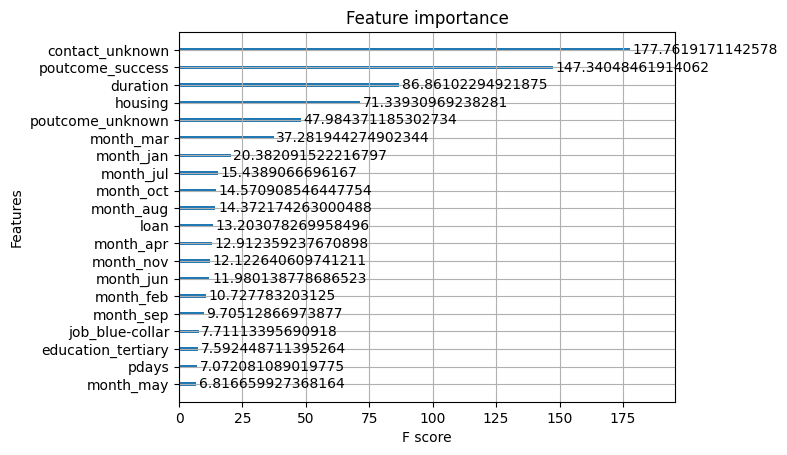

In [42]:
from xgboost import plot_importance

plt.figure(figsize=(10,6))
plot_importance(xgb_best, max_num_features=20, importance_type="gain")
plt.show()

# Submission

In [40]:
# Predict probabilities for test set
y_pred = xgb_best.predict_proba(test_df)[:, 1]

In [41]:
# Submission File
submission = pd.DataFrame({
    "id": test_df["id"],
    "y": y_pred  # probabilities
})

submission.to_csv("submission.csv", index=False)
print("Submission successful")
submission.head() 

Submission successful


,id,y
0,750000,0.002694
1,750001,0.092964
2,750002,0.000395
3,750003,0.000316
4,750004,0.013432
